In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 

%matplotlib inline

In [41]:
df = pd.read_csv("hate_crimes_datasd.csv")
df

,case_number,date,year,month,time,date_time,crime_code,crime,block,street,...,suspect_sex_1,suspect_sex_2,victim_race_0,victim_race_1,victim_race_2,victim_race_3,victim_sex_0,victim_sex_1,victim_sex_2,victim_sex_3
0,16000456,2016-01-04,2016,1,2:00:00 AM,2016-01-04,243(D)M,"Assault, No Weapon",500.0,G,...,M,M,O,NaN,NaN,NaN,M,NaN,NaN,NaN
1,16001278,2016-01-10,2016,1,1:30:00 AM,2016-01-10,245A1,"Assault, w/Weapon",3400.0,30th,...,M,M,B,NaN,NaN,NaN,M,NaN,NaN,NaN
2,16004522,2016-01-31,2016,1,02:30:00,2016-01-31,594(B)(4),Vandalism,1400.0,Imperial,...,NaN,NaN,H,W,NaN,NaN,F,M,NaN,NaN
3,16005962,2016-02-09,2016,2,4:30:00 PM,2016-02-09,422.22(a)(4),"Threat, Phone Call",4100.0,Ute,...,NaN,NaN,B,NaN,NaN,NaN,M,NaN,NaN,NaN
4,16005900,2016-02-10,2016,2,00:45:00,2016-02-10,417A1:M,Threat,100.0,University,...,NaN,NaN,B,A,NaN,NaN,M,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,22039475,2022-09-11,2022,9,17:28:57,2022-09-11,243(A)/422.6(A) PC,Battery,300.0,Date,...,M,NaN,H,NaN,NaN,NaN,M,NaN,NaN,NaN
262,22041551,2022-09-25,2022,9,19:19:19,2022-09-25,243D/368 PC/422.6(A),Battery,12000.0,Scripps Summit,...,NaN,NaN,M,NaN,NaN,NaN,M,NaN,NaN,NaN
263,22042944,2022-10-04,2022,10,05:23:41,2022-10-04,245/422.6/3056 PC,Assault,7600.0,Hazard Center,...,NaN,NaN,H,NaN,NaN,NaN,M,NaN,NaN,NaN
264,22043518,2022-10-07,2022,10,07:50:00,2022-10-07,422 PC,Threat,5300.0,Javier,...,NaN,NaN,H,H,NaN,NaN,F,M,NaN,NaN


In [42]:
df.columns

Index(['case_number', 'date', 'year', 'month', 'time', 'date_time',
       'crime_code', 'crime', 'block', 'street', 'type', 'beat', 'command',
       'weapon', 'motivation', 'number_of_suspects', 'suspect', 'victim_count',
       'victim_other', 'injury', 'suspect_race_0', 'suspect_race_1',
       'suspect_race_2', 'suspect_sex_0', 'suspect_sex_1', 'suspect_sex_2',
       'victim_race_0', 'victim_race_1', 'victim_race_2', 'victim_race_3',
       'victim_sex_0', 'victim_sex_1', 'victim_sex_2', 'victim_sex_3'],
      dtype='object')

In [43]:
df.motivation.value_counts()

Race                       133
Sexual Orientation          65
Religion                    46
Sex                          8
Gender                       3
Sexuality                    2
Race/Religion                2
Race/Sex                     2
Race/Sexual Orientation      1
Race/Disability              1
Anti-Transgender             1
Anti-Religion                1
Rel/Sex                      1
Name: motivation, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_number         266 non-null    int64  
 1   date                266 non-null    object 
 2   year                266 non-null    int64  
 3   month               266 non-null    int64  
 4   time                266 non-null    object 
 5   date_time           266 non-null    object 
 6   crime_code          266 non-null    object 
 7   crime               266 non-null    object 
 8   block               258 non-null    float64
 9   street              266 non-null    object 
 10  type                252 non-null    object 
 11  beat                266 non-null    int64  
 12  command             266 non-null    object 
 13  weapon              266 non-null    object 
 14  motivation          266 non-null    object 
 15  number_of_suspects  266 non-null    object 
 16  suspect 

Handling missing values

In [45]:
df.isnull().sum()

case_number             0
date                    0
year                    0
month                   0
time                    0
date_time               0
crime_code              0
crime                   0
block                   8
street                  0
type                   14
beat                    0
command                 0
weapon                  0
motivation              0
number_of_suspects      0
suspect                 0
victim_count            1
victim_other          211
injury                  1
suspect_race_0          0
suspect_race_1        233
suspect_race_2        251
suspect_sex_0           1
suspect_sex_1         233
suspect_sex_2         251
victim_race_0          39
victim_race_1         225
victim_race_2         258
victim_race_3         265
victim_sex_0           38
victim_sex_1          225
victim_sex_2          258
victim_sex_3          265
dtype: int64

In [46]:
df.drop(columns=['victim_other','suspect_race_1','suspect_race_2','suspect_sex_1','suspect_sex_2','victim_race_1','victim_race_2','victim_race_3','victim_sex_1','victim_sex_2','victim_sex_3'],inplace=True)

In [47]:
df.head()

,case_number,date,year,month,time,date_time,crime_code,crime,block,street,...,weapon,motivation,number_of_suspects,suspect,victim_count,injury,suspect_race_0,suspect_sex_0,victim_race_0,victim_sex_0
0,16000456,2016-01-04,2016,1,2:00:00 AM,2016-01-04,243(D)M,"Assault, No Weapon",500.0,G,...,"Hands, Fists, Feet",Race,3,Unknown,1.0,Hospital,O,M,O,M
1,16001278,2016-01-10,2016,1,1:30:00 AM,2016-01-10,245A1,"Assault, w/Weapon",3400.0,30th,...,Stick,Race,3,Unknown,1.0,No Treat.,Unk,M,B,M
2,16004522,2016-01-31,2016,1,02:30:00,2016-01-31,594(B)(4),Vandalism,1400.0,Imperial,...,Marker,Race,Unk,Unknown,2.0,None,Unk,Unk,H,F
3,16005962,2016-02-09,2016,2,4:30:00 PM,2016-02-09,422.22(a)(4),"Threat, Phone Call",4100.0,Ute,...,Phone,Race,1,Known,1.0,None,H,M,B,M
4,16005900,2016-02-10,2016,2,00:45:00,2016-02-10,417A1:M,Threat,100.0,University,...,Knife,Race,1,Unknown,2.0,None,W,M,B,M


In [48]:
df.isnull().sum()

case_number            0
date                   0
year                   0
month                  0
time                   0
date_time              0
crime_code             0
crime                  0
block                  8
street                 0
type                  14
beat                   0
command                0
weapon                 0
motivation             0
number_of_suspects     0
suspect                0
victim_count           1
injury                 1
suspect_race_0         0
suspect_sex_0          1
victim_race_0         39
victim_sex_0          38
dtype: int64

In [49]:
df.type.value_counts()

St         82
Av         51
Dr         28
Rd         23
Ave        20
Bl         15
Wy          8
Blvd        6
Pl          4
Way         2
Ln          2
Ct          2
Av/St       1
Pky         1
Pkw         1
Pz          1
Pky/Way     1
Wk          1
Dr/Rd       1
St/Av       1
St          1
Name: type, dtype: int64

In [50]:
df.dropna(subset=['type', 'victim_count','injury','suspect_sex_0','victim_race_0','victim_race_0','victim_sex_0'],inplace=True)
df['block'].fillna(df['block'].mean(), inplace=True)

In [51]:
df.isnull().sum()

case_number           0
date                  0
year                  0
month                 0
time                  0
date_time             0
crime_code            0
crime                 0
block                 0
street                0
type                  0
beat                  0
command               0
weapon                0
motivation            0
number_of_suspects    0
suspect               0
victim_count          0
injury                0
suspect_race_0        0
suspect_sex_0         0
victim_race_0         0
victim_sex_0          0
dtype: int64

In [52]:
df.shape

(214, 23)

In [53]:
from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include=['object']).columns

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [54]:
df.head()

,case_number,date,year,month,time,date_time,crime_code,crime,block,street,...,weapon,motivation,number_of_suspects,suspect,victim_count,injury,suspect_race_0,suspect_sex_0,victim_race_0,victim_sex_0
0,16000456,0,2016,1,149,0,19,2,500.0,80,...,21,1,2,1,1.0,0,5,2,7,2
1,16001278,1,2016,1,119,1,34,3,3400.0,12,...,47,1,2,1,1.0,3,6,2,1,2
2,16004522,2,2016,1,11,2,76,14,1400.0,88,...,28,1,6,1,2.0,4,6,4,4,0
3,16005962,3,2016,2,150,3,45,13,4100.0,155,...,38,1,0,0,1.0,4,3,2,1,2
4,16005900,4,2016,2,5,4,41,12,100.0,154,...,23,1,0,1,2.0,4,7,2,1,2


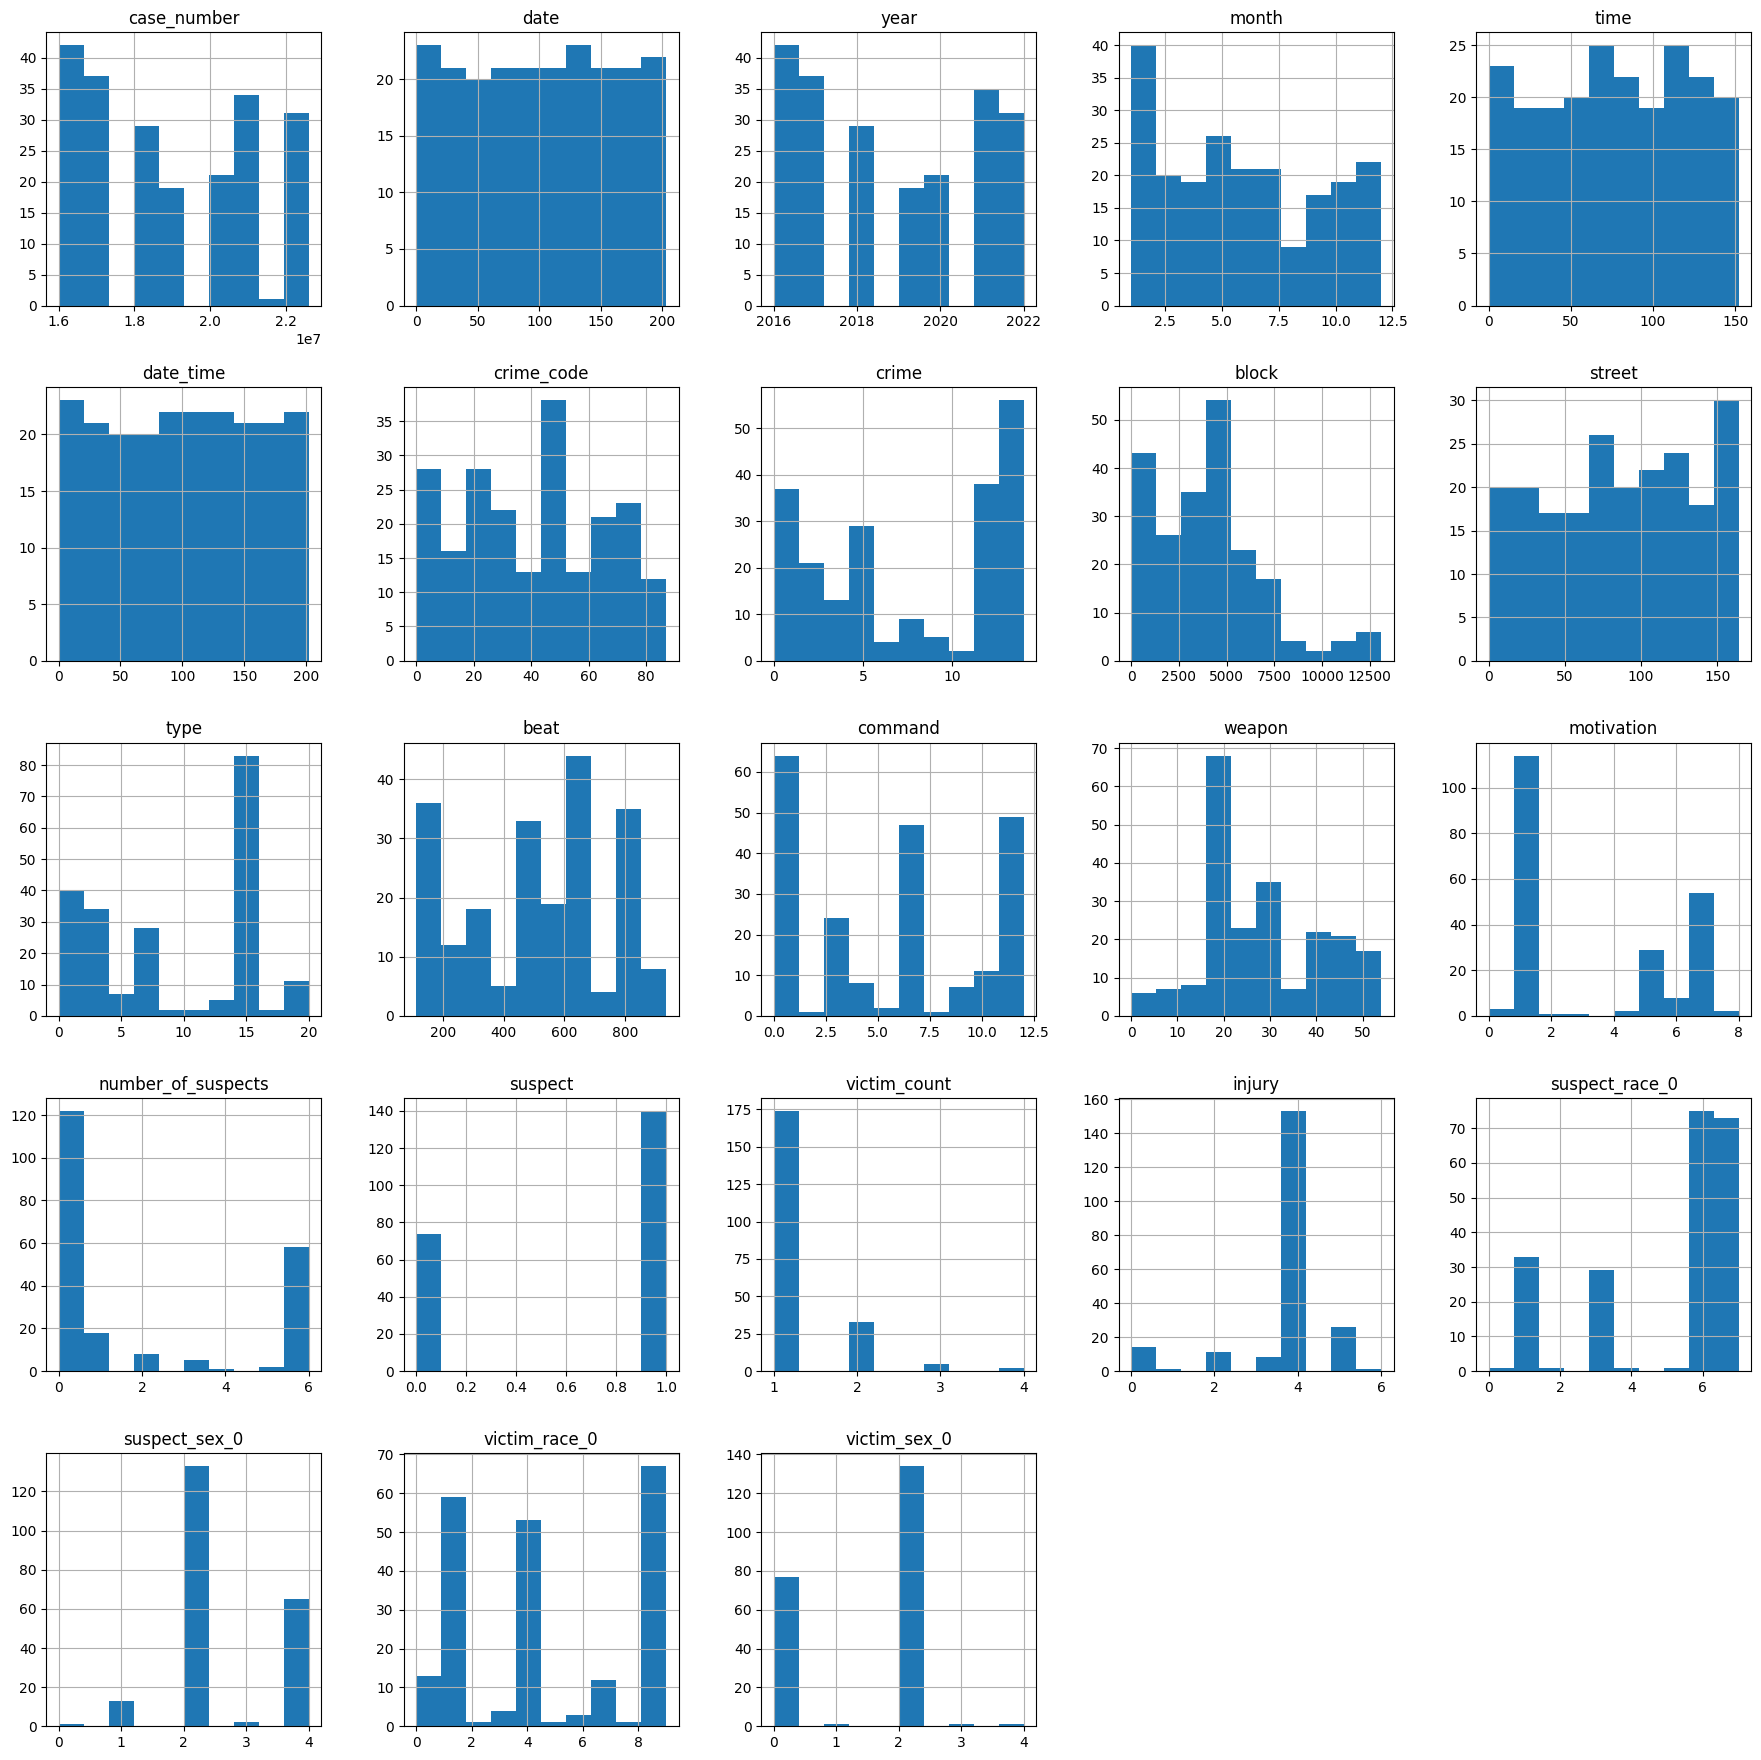

In [55]:
plot = df.hist(figsize=(22,22))

In [56]:
X = df.drop(columns='motivation')
y = df['motivation']

Scaling

In [57]:
# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### KNN

Original

In [59]:
# Fit your KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

print("Test score: {:.3f}".format(knn.score(X_test,y_test)))

# Generate a classification report
print(classification_report(y_test, y_pred))

Test score: 0.648
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.68      0.86      0.76        29
           5       0.25      0.20      0.22         5
           6       0.00      0.00      0.00         1
           7       0.75      0.53      0.62        17

    accuracy                           0.65        54
   macro avg       0.34      0.32      0.32        54
weighted avg       0.62      0.65      0.62        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

PCA

In [60]:
# Apply PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Fit your KNN model to the PCA-transformed training data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Apply PCA to the testing data
X_test_pca = pca.transform(X_test)

# Predict on the PCA-transformed testing data
y_pred_pca = knn_pca.predict(X_test_pca)

print("Test score: {:.3f}".format(knn_pca.score(X_test_pca,y_pred_pca)))

# Generate a classification report
print(classification_report(y_test, y_pred_pca))

Test score: 1.000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.68      0.86      0.76        29
           5       0.25      0.20      0.22         5
           6       0.00      0.00      0.00         1
           7       0.75      0.53      0.62        17

    accuracy                           0.65        54
   macro avg       0.34      0.32      0.32        54
weighted avg       0.62      0.65      0.62        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

LDA

In [61]:
# Apply LDA to the training data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Fit your KNN model to the LDA-transformed training data
knn_lda = KNeighborsClassifier(n_neighbors=5)
knn_lda.fit(X_train_lda, y_train)

# Apply LDA to the testing data
X_test_lda = lda.transform(X_test)

# Predict on the LDA-transformed testing data
y_pred_lda = knn_lda.predict(X_test_lda)

print("Test score: {:.3f}".format(knn_lda.score(X_test_lda,y_pred_lda)))

# Generate a classification report
print(classification_report(y_test, y_pred_lda))

Test score: 1.000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.62      0.90      0.73        29
           5       0.25      0.20      0.22         5
           6       0.00      0.00      0.00         1
           7       0.25      0.12      0.16        17

    accuracy                           0.54        54
   macro avg       0.22      0.24      0.22        54
weighted avg       0.43      0.54      0.46        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Undersampling

In [62]:
# Apply RandomUnderSampler to the training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Fit your KNN model to the undersampled training data
knn_rus = KNeighborsClassifier(n_neighbors=5)
knn_rus.fit(X_train_rus, y_train_rus)

# Predict on the testing data
y_pred_rus = knn_rus.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred_rus))


              precision    recall  f1-score   support

           0       0.06      1.00      0.12         2
           1       0.84      0.55      0.67        29
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        17

    accuracy                           0.33        54
   macro avg       0.13      0.22      0.11        54
weighted avg       0.45      0.33      0.36        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

Oversampling 

In [63]:
# Apply RandomOverSampler to the training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Fit your KNN model to the oversampled training data
knn_ros = KNeighborsClassifier(n_neighbors=5)
knn_ros.fit(X_train_ros, y_train_ros)

# Predict on the testing data
y_pred_ros = knn_ros.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred_ros))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.34      0.49        29
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.30      0.60      0.40         5
           6       0.33      1.00      0.50         1
           7       0.50      0.53      0.51        17
           8       0.00      0.00      0.00         0

    accuracy                           0.43        54
   macro avg       0.22      0.27      0.21        54
weighted avg       0.64      0.43      0.47        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [64]:
# # Apply SMOTE to the training data
# smote = SMOTE(k_neighbors=2)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Fit your KNN model to the SMOTE-transformed training data
# knn_smote = KNeighborsClassifier(n_neighbors=3)
# knn_smote.fit(X_train_smote, y_train_smote)

# # Predict on the testing data
# y_pred_smote = knn_smote.predict(X_test)

# # Generate a classification report
# print(classification_report(y_test, y_pred_smote))


### Decision Tree

Original

In [65]:
# Define your decision tree model
dtc = DecisionTreeClassifier(random_state=42)

# Apply random undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_rt, y_train_rt = rus.fit_resample(X_train, y_train)

# Fit your decision tree model to the undersampled training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_rus, y_train_rus)

# Predict on the testing data
y_pred_rus = dtc.predict(X_test)

# Generate a classification report
print("Classification Report - Original:")
print(classification_report(y_test, y_pred_rus))

Classification Report - Original:
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.75      0.10      0.18        29
           4       0.00      0.00      0.00         0
           5       0.50      0.20      0.29         5
           6       0.00      0.00      0.00         1
           7       0.30      0.18      0.22        17
           8       0.00      0.00      0.00         0

    accuracy                           0.15        54
   macro avg       0.24      0.14      0.13        54
weighted avg       0.55      0.15      0.20        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Undersampling

In [66]:

# Define your decision tree model
dtc = DecisionTreeClassifier(random_state=42)

# Apply random undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Fit your decision tree model to the undersampled training data
dtc_rus = DecisionTreeClassifier(random_state=42)
dtc_rus.fit(X_train_rus, y_train_rus)

# Predict on the testing data
y_pred_rus = dtc_rus.predict(X_test)

# Generate a classification report
print("Classification Report - Random Undersampling:")
print(classification_report(y_test, y_pred_rus))

Classification Report - Random Undersampling:
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         2
           1       0.75      0.10      0.18        29
           4       0.00      0.00      0.00         0
           5       0.50      0.20      0.29         5
           6       0.00      0.00      0.00         1
           7       0.30      0.18      0.22        17
           8       0.00      0.00      0.00         0

    accuracy                           0.15        54
   macro avg       0.24      0.14      0.13        54
weighted avg       0.55      0.15      0.20        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Oversampling

In [67]:
# Apply random oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Fit your decision tree model to the oversampled training data
dtc_ros = DecisionTreeClassifier(random_state=42)
dtc_ros.fit(X_train_ros, y_train_ros)

# Predict on the testing data
y_pred_ros = dtc_ros.predict(X_test)

# Generate a classification report
print("Classification Report - Random Oversampling:")
print(classification_report(y_test, y_pred_ros))

Classification Report - Random Oversampling:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.65      0.76      0.70        29
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.33      0.20      0.25         5
           6       0.50      1.00      0.67         1
           7       0.60      0.35      0.44        17

    accuracy                           0.56        54
   macro avg       0.26      0.29      0.26        54
weighted avg       0.58      0.56      0.55        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

PCA

In [68]:
# Apply PCA to the training data
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

# Fit your decision tree model to the PCA-transformed training data
dtc_pca = DecisionTreeClassifier(random_state=42)
dtc_pca.fit(X_train_pca, y_train)

# Apply the same PCA transformation to the testing data
X_test_pca = pca.transform(X_test)

# Predict on the testing data
y_pred_pca = dtc_pca.predict(X_test_pca)

# Generate a classification report
print("Classification Report - PCA:")
print(classification_report(y_test, y_pred_pca))

Classification Report - PCA:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.69      0.62      0.65        29
           4       0.00      0.00      0.00         0
           5       0.22      0.40      0.29         5
           6       0.00      0.00      0.00         1
           7       0.60      0.53      0.56        17

    accuracy                           0.54        54
   macro avg       0.25      0.26      0.25        54
weighted avg       0.58      0.54      0.56        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

LDA

In [69]:
# Apply LDA to the training data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Fit your decision tree model to the LDA-transformed training data
dtc_lda = DecisionTreeClassifier(random_state=42)
dtc_lda.fit(X_train_lda, y_train)

# Apply the same LDA transformation to the testing data
X_test_lda = lda.transform(X_test)

# Predict on the testing data
y_pred_lda = dtc_lda.predict(X_test_lda)

print("Classification Report - Decision Tree with LDA:")
print(classification_report(y_test, y_pred_lda))


Classification Report - Decision Tree with LDA:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.66      0.66      0.66        29
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.50      0.35      0.41        17
           8       0.00      0.00      0.00         0

    accuracy                           0.46        54
   macro avg       0.14      0.13      0.13        54
weighted avg       0.51      0.46      0.48        54



c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

Outlier detection

In [70]:
# perform ISF
isf = IsolationForest(n_estimators=100, contamination=0.01)
isf.fit(X)
outliers_isf = isf.predict(X) == -1

In [71]:
# perform LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(X) == -1

In [72]:
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
ocsvm_pred = ocsvm.fit_predict(X) == -1

c:\Users\suritha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'k-Means')

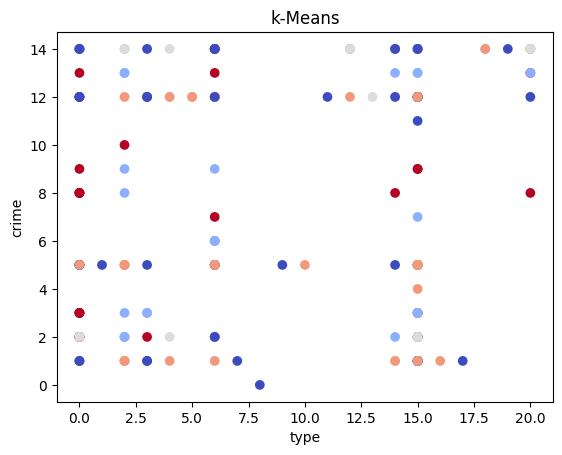

In [73]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
df["kmeans_labels"] = kmeans.labels_

# Visualize the clusters using scatter plots

plt.scatter(df["type"], df["crime"], c=df["kmeans_labels"], cmap="coolwarm")
plt.xlabel("type")
plt.ylabel("crime")
plt.title("k-Means")

In [74]:
from sklearn.svm import SVC

# classify using SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
train_labels_svm = svm.predict(X_train)
test_labels_svm = svm.predict(X_test)

In [75]:
# classify using RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
train_labels_rf = rf.predict(X_train)
test_labels_rf = rf.predict(X_test)

In [76]:
# classify using MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train, y_train)
train_labels_mlp = mlp.predict(X_train)
test_labels_mlp = mlp.predict(X_test)